In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
# same paths as before
data_dir = "C:/Users/tysir/Documents/Emotion_Recognition"
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

img_size = (48, 48)

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=32,
    shuffle=True)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=32,
    shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [3]:
model = Sequential([
    Input(shape=(48, 48, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')])

In [4]:
# compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy'])

In [5]:
# set up callbacks and train
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint("emotion_model.keras", save_best_only=True)]

history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=15,
    callbacks=callbacks)

Epoch 1/15
  4/898 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.1452 - loss: 1.9388

C:\Users\tysir\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.2416 - loss: 1.8400 - val_accuracy: 0.3013 - val_loss: 1.7343
Epoch 2/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.3265 - loss: 1.7110 - val_accuracy: 0.3855 - val_loss: 1.6042
Epoch 3/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.3843 - loss: 1.6048 - val_accuracy: 0.4198 - val_loss: 1.5202
Epoch 4/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.4140 - loss: 1.5362 - val_accuracy: 0.4404 - val_loss: 1.4767
Epoch 5/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.4326 - loss: 1.4878 - val_accuracy: 0.4524 - val_loss: 1.4305
Epoch 6/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.4465 - loss: 1.4479 - val_accuracy: 0.4719 - val_loss: 1.4077
Epoch 7/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.4614 - loss: 1.4083 - val_accuracy: 0.4850 - val_loss: 1.3665
Epoch 8/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.4753 - loss: 1.3882 - val_accurac

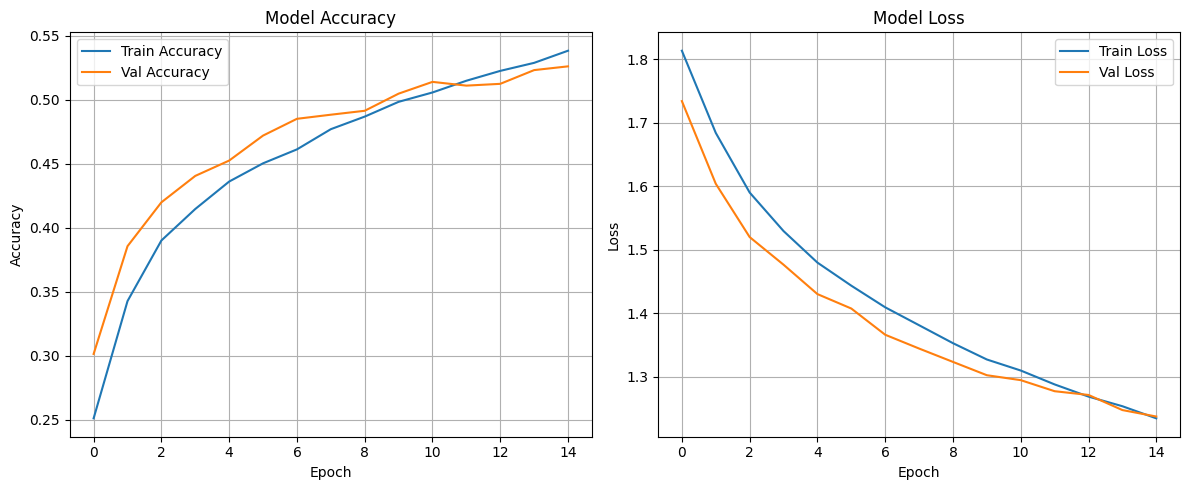

In [6]:
# plot accuracy and loss curves
plt.figure(figsize=(12, 5))

# accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [7]:
model.save("final_emotion_model.keras")